# Decorations

**Utilities for setting up Matplotlib plots for Journal Articles.**

## Overview

The `decorations` package provides customizable settings for Matplotlib to create 
publication-ready plots. It includes options for font size, figure size, color 
palettes, and marker types that are particularly suitable for journals such as 
ApJ and MNRAS.

## Installation

To install the package, you can use `pip`. You have two options:

1. **Install directly from GitHub**:
   ```bash
   pip install git+https://github.com/edgar-perez-vidal/decorations.git
2. **Clone the repository and install locally** (Recommended for Personalization):
   ```bash  
   git clone https://github.com/edgar-perez-vidal/decorations.git
   cd decorations
   pip install -e .
To get started, check out the the tutorial below or check out the decorations_quickstart notebook!
If you make use of this package, please send over any figures so I can show them case it here!


# Tutorial for the package decorations, based in Matplotlib

The `decorations` package was created to address a common challenge faced by many students and researchers: the need to generate numerous test plots using basic Matplotlib settings, only to return later to beautify them for submission or feedback. This often results in extra work and inconsistent presentation quality.

Decorations solves this problem by offering pre-configured plotting settings that produce aesthetically pleasing visuals right from the start. The package streamlines the plotting process, enabling users to create high-quality graphics immediately, without sacrificing the flexibility to further customize their plots as needed.

With Decorations, you can focus on your data while ensuring that your plots are ready for assignments, presentations, or feedback. As always, personilization is always encourage, so feel free to fine tune parameters to suit your needs. Enjoy!

In [1]:
from decorations import load_plot_settings, error_bar_settings
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Example Plot: Traditional Plotting Routine
Let's create a traditional plot with a sine wave and some noisy data.

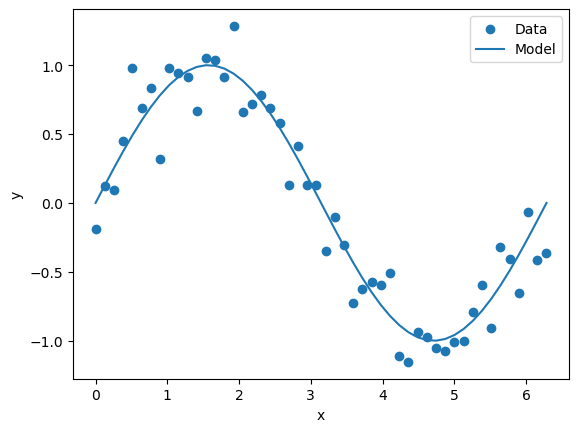

In [2]:
# Data for the plot with added noise
x = np.linspace(0, 2 * np.pi, 50)
y1 = np.sin(x)
y2 = np.cos(x)

y1_noisy = y1 + 0.2 * np.random.normal(size=x.size)  # Add some noise

# Create the sine wave plot with error bars
plt.figure()
plt.scatter(x, y1_noisy, label='Data',)
plt.plot(x, y1, marker = '', label='Model',) # As of version='0.1.0', you will need to state marker = 'none' to get a line

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

Pretty standard plot... Lets see what we can do to improve

## Using the `load_plot_settings` Function

In this example, we'll demonstrate how to use the **decorations** package to create a plot with error bars and residuals.

In [3]:
# Default parameters for load_plot_settings function
# Feel free to customize these values according to your specific plotting needs

load_plot_settings(
    fontsize=10,  # Font size for text in plots (default is 10, adjust as needed)
    figsize=(3.5, 3.5),  # Figure size (default is 3.5x3.5 for two-column figures)
    major_tick_size = 5, # set the length of the major ticks, minor ticks are half this value
    dpi=175,  # Dots per inch for plot resolution (higher values result in better quality)
              # This is main to scale the output plot but maintain figsize, standard dpi when saving fig is set to 300
    
    # Colors for cycling through data points
    # Use a custom list for your own palette, or leave as None to use the default color-blind friendly palette
    colors=None,  # default: ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB']
    
    # Markers for plotting
    # Use a custom list for different marker shapes, or leave as None to use the default set
    markers=None,  # default: ['o', 's', '^', 'v', 'D', 'P', 'X']
    
    latex=False  # Set to True to enable LaTeX formatting for text; set to False for plain text
)

# load_plot_settings() # run on the default setting shown above

Hi edgar839, you have imported plooting decorations. 
    Note: 
    Figsize = (3.5, 3.5) for coloumn figures
    Fontsize: 10
    Colorblind Pallet: ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB']
    Marker: ['o', 's', '^', 'v', 'D', 'P', 'X']
    Cheers!


# Lets run the exact same code as before

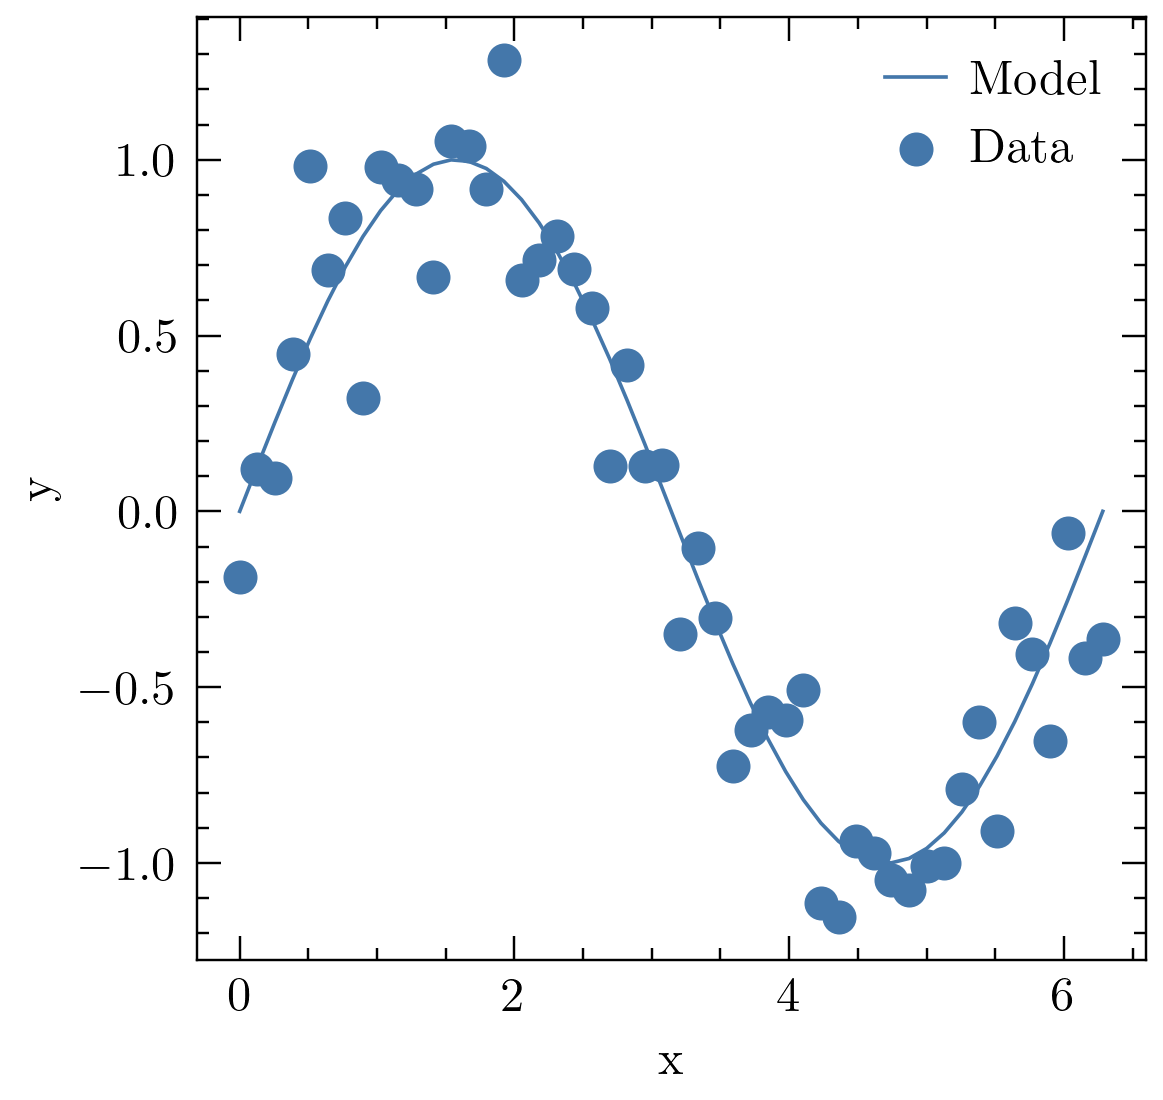

In [5]:
# Create the sine wave plot with error bars
plt.figure()
plt.plot(x, y1, marker = '', label='Model',) # As of version='0.1.0', you will need to state marker = 'none' to get a line
plt.scatter(x, y1_noisy, label='Data',)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

ahh much better! Lets try something a little cleaner, such as fitting fake data and seeing the residuals. In this example, we'll use `gridspec` for a multi-panel plot.

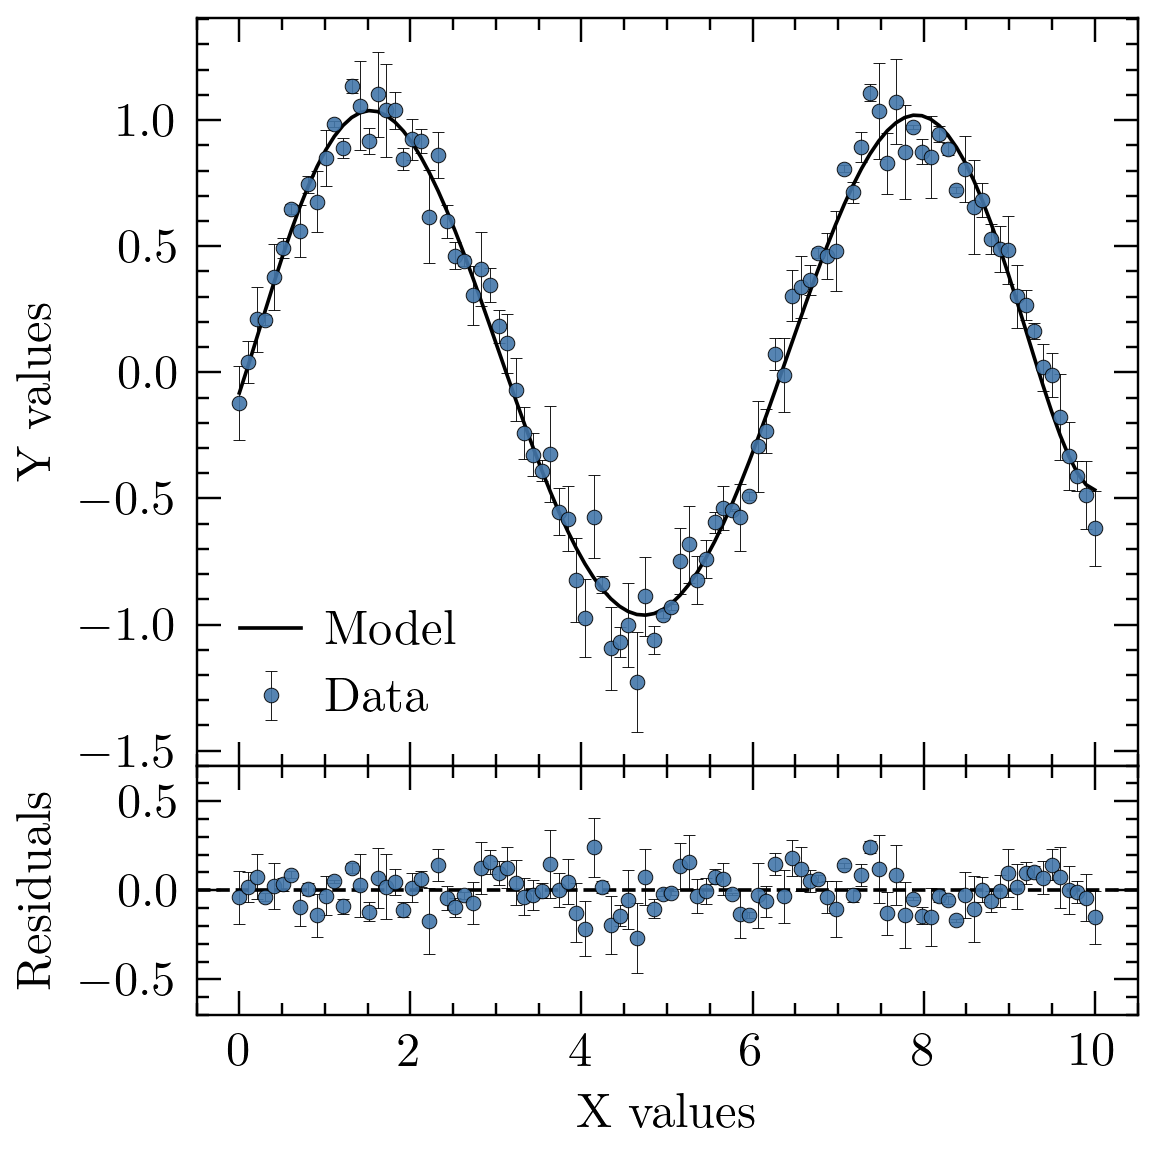

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Generate some test data (sine wave with noise)
x = np.linspace(0, 10, 100)
y_data = np.sin(x) + 0.1 * np.random.normal(size=x.size)  # Noisy sine wave
yerr = 0.2 * np.random.uniform(low=0, high = 1,size=x.size)
y_model = np.polyval(np.polyfit(x, y_data, 6), x)  # Polynomial fit as a model

# Calculate residuals
residuals = y_data - y_model

# Create the figure and grid spec
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1],hspace= 0)  # 3:1 ratio for top and bottom panels

# Top panel: data and model
ax1 = fig.add_subplot(gs[0])
ax1.errorbar(x, y_data, yerr = yerr, **error_bar_settings, label="Data")  # Plot data
ax1.plot(x, y_model, 'k-', label="Model")  # Plot model
ax1.legend()
ax1.set_ylabel("Y values")

# Remove tick labels from the upper x-axis
ax1.tick_params(axis='x', which='both', labelbottom=False)

# Bottom panel: residuals
ax2 = fig.add_subplot(gs[1])
ax2.errorbar(x, residuals,yerr =yerr, **error_bar_settings)  # Plot residuals
ax2.axhline(0, color='k', linestyle='--')  # Zero line for residuals
ax2.set_ylim(-.7,.7)

ax2.set_xlabel("X values")
ax2.set_ylabel("Residuals",fontsize = 10)

# Adjust layout
plt.tight_layout()

# Save Figure: Defualt Params
    #  "savefig.bbox": 'tight',
    #  "savefig.pad_inches": 0.05,
    #  "savefig.dpi": 300
# plt.savefig('test.pdf',)


## A closer look at `error_bar_settings` in plots

In this example, we will generate fake data and visualize it with error bars using `error_bar_settings` dictionary. This showcases how to markers and colors are automatically cycled through. Note that `error_bar_settings` is a standard dictionary that can be costumized as needed

In [7]:
error_bar_settings

# error_bar_settings['ms'] = 5 # example of changing marker size

{'ms': 3.0,
 'mec': 'black',
 'ecolor': 'black',
 'capsize': 1.25,
 'capthick': 0.2,
 'mew': 0.2,
 'elinewidth': 0.2,
 'alpha': 0.9,
 'zorder': 2,
 'linestyle': 'none'}

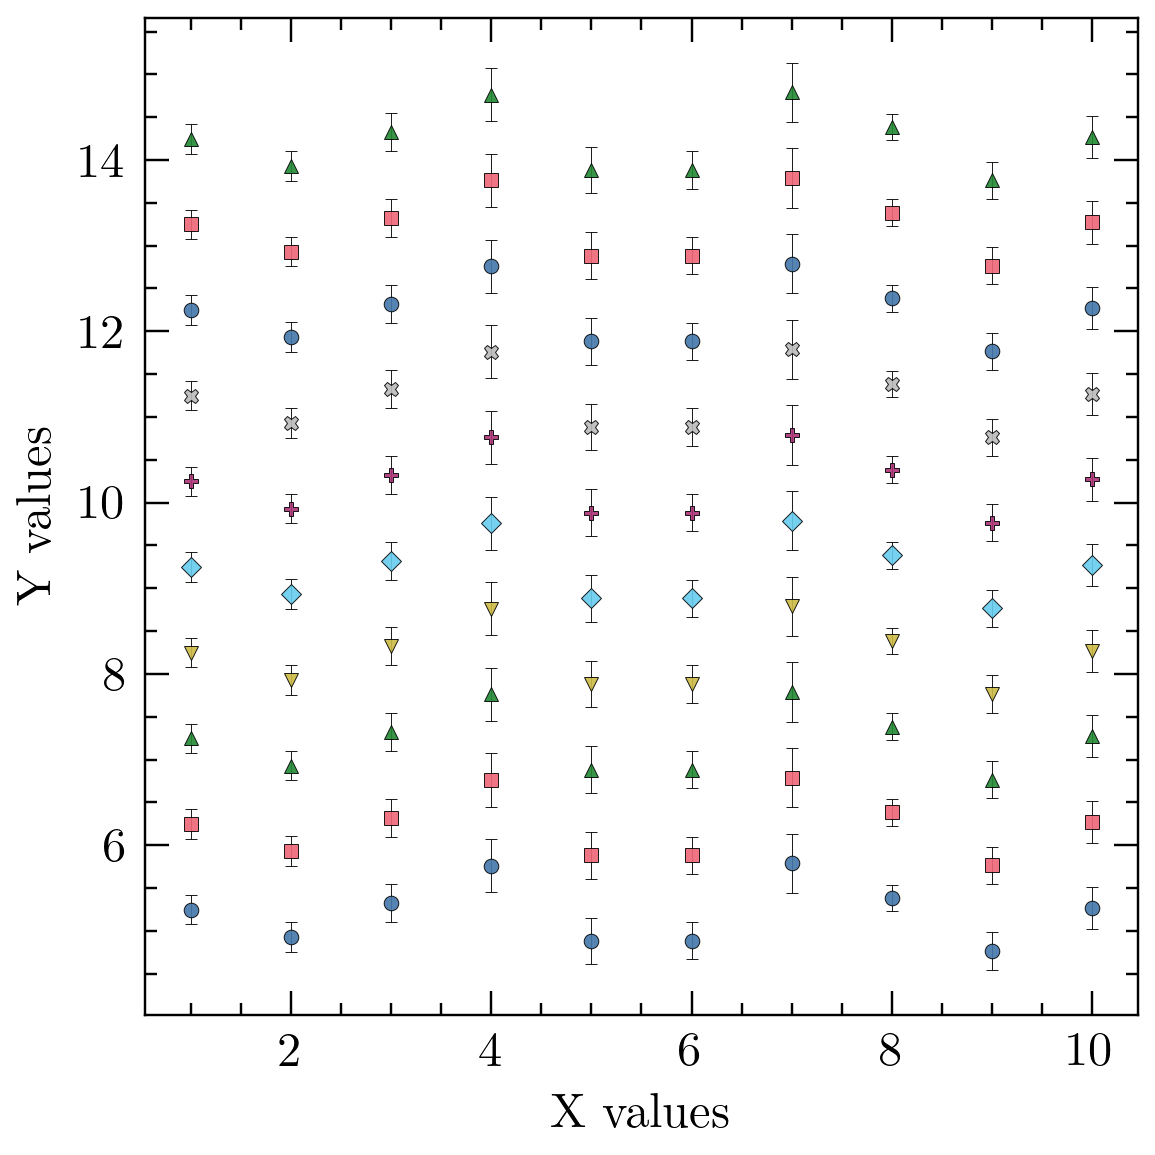

In [8]:
import numpy as np

# Generate fake data
np.random.seed(42)
x = np.linspace(1, 10, 10)
y1 = np.random.normal(5, 0.5, size=len(x))
# Errors
yerr1 = np.random.uniform(0.1, 0.5, size=len(x))

fig, ax = plt.subplots(dpi = 175)
# Plot the data with error bars and cycle marker shapes
for i in np.arange(10):
    ax.errorbar(x, y1+i, yerr=yerr1,**error_bar_settings)


# Add labels and legend
ax.set_xlabel('X values')
ax.set_ylabel('Y values')

# Show the plot
plt.tight_layout()
plt.show()

To see the matplotlib parameters run the following

In [9]:
# Long List of parameters
# plt.rcParams
